In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [5]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [6]:
df = pd.read_csv(r"/content/drive/MyDrive/Dataset/car_data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
df = df.drop(['Unnamed: 0', 'New_Price'], axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<ipython-input-10-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

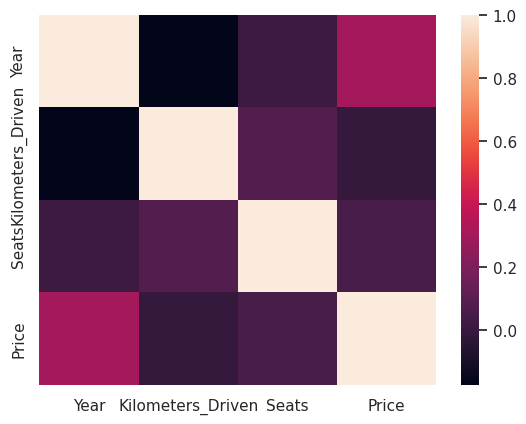

In [10]:
sns.heatmap(df.corr())

<ipython-input-11-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

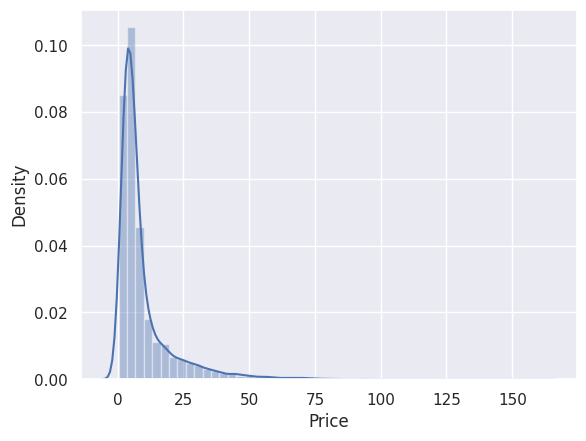

In [11]:
sns.distplot(df['Price'])

In [ ]:
# Cat Cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage','Engine', 'Power']

In [41]:
numerial_data = df.drop(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage','Engine', 'Power'], axis = 1)
numerial_data.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [42]:
cat_data = df[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage','Engine', 'Power']]
cat_data.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


In [44]:
cat_data_num[['Transmission_Manual', 'Transmission_Automatic']]

,Transmission_Manual,Transmission_Automatic
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
6014,1,0
6015,1,0
6016,1,0
6017,1,0


In [43]:
cat_data_num = pd.get_dummies(cat_data)
cat_data_num.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
complete_df = pd.concat([numerial_data, cat_data_num], axis=1)
complete_df.head()

,Year,Kilometers_Driven,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,2010,72000,5.0,1.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [47]:
complete_df.dropna(inplace=True)

In [49]:
complete_df.isnull().sum()

Year                  0
Kilometers_Driven     0
Seats                 0
Price                 0
Location_Ahmedabad    0
                     ..
Power_98.82 bhp       0
Power_98.96 bhp       0
Power_99 bhp          0
Power_99.6 bhp        0
Power_null bhp        0
Length: 986, dtype: int64

In [52]:
X = complete_df.drop(['Price'], axis=1)
y = complete_df['Price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
X_train.shape

(4781, 985)

In [59]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [63]:
input_layer = Input(shape=(X_train.shape[1],))
dense_layer0 = Dense(100, activation = 'relu')(input_layer)
dense_layer1 = Dense(50, activation = 'relu')(dense_layer0)
dense_layer2 = Dense(25, activation = 'relu')(dense_layer1)
dense_layer3 = Dense(10, activation = 'relu')(dense_layer2)
dense_layer4 = Dense(5, activation = 'relu')(dense_layer3)
dense_layer5 = Dense(2, activation = 'relu')(dense_layer4)
output = Dense(1)(dense_layer5)

In [65]:
from keras.utils.sidecar_evaluator import optimizer
model = Model(inputs = input_layer, outputs = output)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])

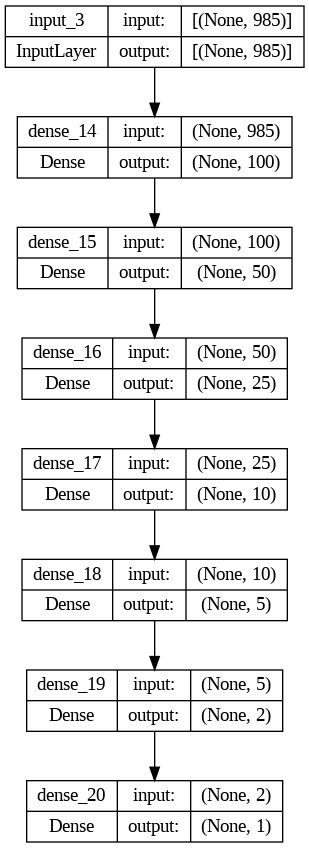

In [66]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [73]:
history = model.fit(X_train, y_train, batch_size=5, epochs = 15, verbose=1, validation_split=0.2)

Epoch 1/15
765/765 [==============================] - 4s 5ms/step - loss: 6.3796 - mean_absolute_error: 6.3796 - val_loss: 7.0616 - val_mean_absolute_error: 7.0616
Epoch 2/15
765/765 [==============================] - 3s 4ms/step - loss: 6.2017 - mean_absolute_error: 6.2017 - val_loss: 6.9200 - val_mean_absolute_error: 6.9200
Epoch 3/15
765/765 [==============================] - 3s 4ms/step - loss: 6.0869 - mean_absolute_error: 6.0869 - val_loss: 6.8320 - val_mean_absolute_error: 6.8320
Epoch 4/15
765/765 [==============================] - 3s 5ms/step - loss: 6.0208 - mean_absolute_error: 6.0208 - val_loss: 6.7748 - val_mean_absolute_error: 6.7748
Epoch 5/15
765/765 [==============================] - 4s 5ms/step - loss: 5.9839 - mean_absolute_error: 5.9839 - val_loss: 6.7460 - val_mean_absolute_error: 6.7460
Epoch 6/15
765/765 [==============================] - 3s 4ms/step - loss: 5.9635 - mean_absolute_error: 5.9635 - val_loss: 6.7254 - val_mean_absolute_error: 6.7254
Epoch 7/15
765/7

In [74]:
from sklearn import metrics

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

38/38 [==============================] - 0s 2ms/step
Mean Absolute Error: 5.81235610681234
Mean Squared Error: 138.08523197134554
Root Mean Squared Error: 11.750967278115684


In [71]:
comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.tolist()})  
comparison_df

,Actual,Predicted
0,3.65,[3.415095567703247]
1,5.87,[3.415095567703247]
2,23.50,[3.415095567703247]
3,2.65,[3.415095567703247]
4,5.80,[3.415095567703247]
...,...,...
1191,8.25,[3.415095567703247]
1192,6.17,[3.415095567703247]
1193,6.50,[3.415095567703247]
1194,3.00,[3.415095567703247]


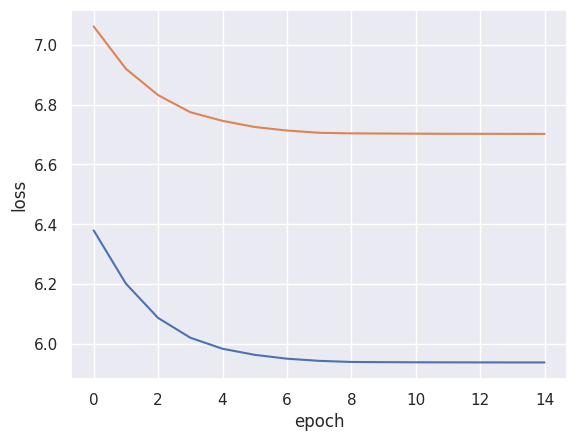

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [76]:
X_test[10].shape

(985,)

In [77]:
single_point = X_test[10].reshape(1,-1)
single_point.shape

(1, 985)

In [78]:
model.predict(single_point)

1/1 [==============================] - 0s 22ms/step


array([[5.6490793]], dtype=float32)

In [79]:
y_test.values[10]

5.85